# TELECOM CHURN CASE STUDY

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. Here we will analyze customer-level data of a leading telecom firm, and build predictive models to identify customers at high risk of churn.

Our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## EDA and Feature Engineering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
#Import the dataset
telecomTrain_df = pd.read_csv ("train.csv")

In [3]:
telecomTrain_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
telecomTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


#### Dataset has 69999 records and 172 columns

In [14]:
#Importing test dataset
telecomTest_df = pd.read_csv ("test.csv")

In [15]:
telecomTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


#### The test dataset has been given separately for this churn case study. It does not have output column churn_probability. We have to build mode on train dataset and find the out the output for test dataset.

In [16]:
telecomTest_df.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [7]:
## There are 172 columns in train dataset we shall go through it and classify the columns

In [8]:
telecomTrain_df.info(verbose =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

#### Classfying features

In [4]:
#Keeping the original dataset copy
orginal_dataset = telecomTrain_df.copy()

In [5]:
# create column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

num_cols = [column for column in telecomTrain_df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecomTrain_df.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


## Checking the missing/null values

In [6]:
telecomTrain_df.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [7]:
# Creating a new data percentage of missing values column wise of our main data
null_percentage = round(telecomTrain_df.isnull().sum()/len(telecomTrain_df.index), 2)*100
null_percentage

id                           0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
loc_og_t2t_mou_6             4.0
loc_og_t2t_mou_7             4.0
loc_og_t2t_mou_8             5.0
loc_og_t2m_mou_6             4.0
loc_og_t2m_mou_7             4.0
loc_og_t2m_mou_8             5.0
loc_og_t2f_mou_6             4.0
loc_og_t2f

In [8]:
null_cols = null_percentage[null_percentage.values > 1].keys()
null_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=120)

120 columns have null values

In [9]:
recharge_cols = [col for col in null_cols if 'rech' in col]
recharge_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

## Null or empty in recharge columns mean customer have not recharged for that month/data. Hence recharge columns is imputed with zeros

In [10]:
zero_impute = ['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [11]:
telecomTrain_df[zero_impute] = telecomTrain_df[zero_impute].apply(lambda x: x.fillna(0))

#### Applying same imputations for test dataset as well

In [17]:
telecomTest_df[zero_impute] = telecomTest_df[zero_impute].apply(lambda x: x.fillna(0))

In [18]:
# replace missing values with '-1' in categorical columns
telecomTrain_df[cat_cols] = telecomTrain_df[cat_cols].apply(lambda x: x.fillna(-1))

In [19]:
# replace missing values with '-1' in categorical columns for test dataset
telecomTest_df[cat_cols] = telecomTest_df[cat_cols].apply(lambda x: x.fillna(-1))

In [20]:
# Checking the date columns
telecomTrain_df[date_cols].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

In [21]:
telecomTrain_df[date_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [23]:
telecomTrain_df['last_date_of_month_6']= telecomTrain_df['last_date_of_month_6'].fillna('6/30/2014')
telecomTrain_df['last_date_of_month_7']= telecomTrain_df['last_date_of_month_7'].fillna('7/31/2014')
telecomTrain_df['last_date_of_month_8']= telecomTrain_df['last_date_of_month_8'].fillna('8/31/2014')

In [24]:
telecomTest_df['last_date_of_month_6']= telecomTest_df['last_date_of_month_6'].fillna('6/30/2014')
telecomTest_df['last_date_of_month_7']= telecomTest_df['last_date_of_month_7'].fillna('7/31/2014')
telecomTest_df['last_date_of_month_8']= telecomTest_df['last_date_of_month_8'].fillna('8/31/2014')

In [25]:
for col in date_cols:
    telecomTrain_df[col] = pd.to_datetime(telecomTrain_df[col])

In [26]:
for col in date_cols:
    telecomTest_df[col] = pd.to_datetime(telecomTest_df[col])

In [25]:
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [28]:
## Calculating the number of days for last recharge wrt to last day of the month

In [29]:
telecomTrain_df['last_rech_6']= telecomTrain_df['last_date_of_month_6']-telecomTrain_df['date_of_last_rech_6']
telecomTrain_df['last_rech_6_data']= telecomTrain_df['last_date_of_month_6']-telecomTrain_df['date_of_last_rech_data_6']
telecomTrain_df['last_rech_7']= telecomTrain_df['last_date_of_month_7']-telecomTrain_df['date_of_last_rech_7']
telecomTrain_df['last_rech_7_data']= telecomTrain_df['last_date_of_month_7']-telecomTrain_df['date_of_last_rech_data_7']
telecomTrain_df['last_rech_8']= telecomTrain_df['last_date_of_month_8']-telecomTrain_df['date_of_last_rech_8']
telecomTrain_df['last_rech_8_data']= telecomTrain_df['last_date_of_month_8']-telecomTrain_df['date_of_last_rech_data_8']

In [30]:
telecomTest_df['last_rech_6']= telecomTest_df['last_date_of_month_6']-telecomTest_df['date_of_last_rech_6']
telecomTest_df['last_rech_6_data']= telecomTest_df['last_date_of_month_6']-telecomTest_df['date_of_last_rech_data_6']
telecomTest_df['last_rech_7']= telecomTest_df['last_date_of_month_7']-telecomTest_df['date_of_last_rech_7']
telecomTest_df['last_rech_7_data']= telecomTest_df['last_date_of_month_7']-telecomTest_df['date_of_last_rech_data_7']
telecomTest_df['last_rech_8']= telecomTest_df['last_date_of_month_8']-telecomTest_df['date_of_last_rech_8']
telecomTest_df['last_rech_8_data']= telecomTest_df['last_date_of_month_8']-telecomTest_df['date_of_last_rech_data_8']

In [31]:
telecomTrain_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,last_rech_6,last_rech_6_data,last_rech_7,last_rech_7_data,last_rech_8,last_rech_8_data
0,0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,8 days,NaT,21 days,NaT,7 days,NaT
1,1,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.0

In [32]:
#Since we have calculated days of last recharge let us drop date columns 
telecomTrain_df.drop(telecomTrain_df[date_cols], inplace = True, axis =1)

In [34]:
#Since we have calculated days of last recharge let us drop date columns for test
telecomTest_df.drop(telecomTest_df[date_cols], inplace = True, axis =1)

KeyError: "None of [Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',\n       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',\n       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',\n       'date_of_last_rech_data_8'],\n      dtype='object')] are in the [columns]"

In [35]:
date_cols_new = [col for col in telecomTrain_df if 'last_rech' in col]
date_cols_new

['last_rech_6',
 'last_rech_6_data',
 'last_rech_7',
 'last_rech_7_data',
 'last_rech_8',
 'last_rech_8_data']

In [36]:
telecomTrain_df[date_cols_new].isnull().sum()

last_rech_6          1101
last_rech_6_data    52431
last_rech_7          1234
last_rech_7_data    52134
last_rech_8          2461
last_rech_8_data    51582
dtype: int64

In [37]:
#Observed that few og columns only 0 and null. Hence making it as 0
telecomTrain_df['loc_og_t2o_mou'] = 0
telecomTrain_df['std_og_t2o_mou'] = 0
telecomTrain_df['loc_ic_t2o_mou'] = 0

In [38]:
telecomTest_df['loc_og_t2o_mou'] = 0
telecomTest_df['std_og_t2o_mou'] = 0
telecomTest_df['loc_ic_t2o_mou'] = 0

In [39]:
mou_og_columns_to_update = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                            'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
                            'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 
                            'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                            'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                            'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
                            'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
                            'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                            'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                            'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                            'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
                            'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 
                            'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                            'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
                            'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                            'og_others_6', 'og_others_7', 'og_others_8']
telecomTrain_df[mou_og_columns_to_update] = telecomTrain_df[mou_og_columns_to_update].fillna(0)
telecomTrain_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,last_rech_6,last_rech_6_data,last_rech_7,last_rech_7_data,last_rech_8,last_rech_8_data
0,0,109,0,0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,8 days,NaT,21 days,NaT,7 days,NaT
1,1,109,0,0,0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,18 days,NaT,21 days,23 days,5 days,NaT
2,2,109,0,0,0,60.806,103.176,0.000,0.53,15.93,0.00,5

In [40]:
telecomTest_df[mou_og_columns_to_update] = telecomTest_df[mou_og_columns_to_update].fillna(0)

In [41]:
null_percentage = round(telecomTrain_df.isnull().sum()/len(telecomTrain_df.index), 2)*100
null_percentage

id                     0.0
circle_id              0.0
loc_og_t2o_mou         0.0
std_og_t2o_mou         0.0
loc_ic_t2o_mou         0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
s

In [42]:
#arpu(average revenue), few date columns have more than 70% null values. Hence dropping those columns
null_cols_arpu = null_percentage[null_percentage.values > 70].keys()
null_cols_arpu

Index(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'last_rech_6_data', 'last_rech_7_data',
       'last_rech_8_data'],
      dtype='object')

#### Drop the columns which has more than 70% null value

In [43]:
telecomTrain_df.drop(telecomTrain_df[null_cols_arpu], inplace = True, axis = 1)

In [44]:
telecomTest_df.drop(telecomTest_df[null_cols_arpu], inplace = True, axis = 1)

In [45]:
telecomTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 160 entries, id to last_rech_8
dtypes: float64(126), int64(31), timedelta64[ns](3)
memory usage: 85.4 MB


In [173]:
telecomTest_df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 159 columns):
 #    Column              Dtype          
---   ------              -----          
 0    id                  int64          
 1    circle_id           int64          
 2    loc_og_t2o_mou      int64          
 3    std_og_t2o_mou      int64          
 4    loc_ic_t2o_mou      int64          
 5    arpu_6              float64        
 6    arpu_7              float64        
 7    arpu_8              float64        
 8    onnet_mou_6         float64        
 9    onnet_mou_7         float64        
 10   onnet_mou_8         float64        
 11   offnet_mou_6        float64        
 12   offnet_mou_7        float64        
 13   offnet_mou_8        float64        
 14   roam_ic_mou_6       float64        
 15   roam_ic_mou_7       float64        
 16   roam_ic_mou_8       float64        
 17   roam_og_mou_6       float64        
 18   roam_og_mou_7       float64        
 19   ro

### MICE Imputation

In [46]:
# Columns to impute using MICE

day_col = ['last_rech_6','last_rech_7','last_rech_8']
churn = ['churn_probability','last_rech_6','last_rech_7','last_rech_8']

In [47]:
cols_no_date  = [col for col in telecomTrain_df if col not in day_col]

In [48]:
cols_no_date_test = [col for col in telecomTest_df if col not in  churn]

In [179]:
cols_no_date_test

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og

In [49]:
# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer 

mice_impute = IterativeImputer()

telecomTrain_df[cols_no_date]=mice_impute.fit_transform(telecomTrain_df[cols_no_date])

In [50]:
telecomTest_df[cols_no_date_test]=mice_impute.fit_transform(telecomTest_df[cols_no_date_test])

In [51]:
## Checking the null values
print(telecomTrain_df.isnull().sum()*100/telecomTrain_df.shape[0])

id                    0.000000
circle_id             0.000000
loc_og_t2o_mou        0.000000
std_og_t2o_mou        0.000000
loc_ic_t2o_mou        0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           0.000000
onnet_mou_7           0.000000
onnet_mou_8           0.000000
offnet_mou_6          0.000000
offnet_mou_7          0.000000
offnet_mou_8          0.000000
roam_ic_mou_6         0.000000
roam_ic_mou_7         0.000000
roam_ic_mou_8         0.000000
roam_og_mou_6         0.000000
roam_og_mou_7         0.000000
roam_og_mou_8         0.000000
loc_og_t2t_mou_6      0.000000
loc_og_t2t_mou_7      0.000000
loc_og_t2t_mou_8      0.000000
loc_og_t2m_mou_6      0.000000
loc_og_t2m_mou_7      0.000000
loc_og_t2m_mou_8      0.000000
loc_og_t2f_mou_6      0.000000
loc_og_t2f_mou_7      0.000000
loc_og_t2f_mou_8      0.000000
loc_og_t2c_mou_6      0.000000
loc_og_t2c_mou_7      0.000000
loc_og_t2c_mou_8      0.000000
loc_og_m

In [52]:
#Drop ID columns
telecomTrain_df = telecomTrain_df.dropna()

In [53]:
telecomTrain_df.drop(['id','circle_id'], axis =1, inplace = True)

In [54]:
telecomTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Columns: 158 entries, loc_og_t2o_mou to last_rech_8
dtypes: float64(155), timedelta64[ns](3)
memory usage: 80.0 MB


### Data Visualisation

In [55]:
#Data Visulisation 
telecomTrain_df.info(verbose =1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column              Dtype          
---   ------              -----          
 0    loc_og_t2o_mou      float64        
 1    std_og_t2o_mou      float64        
 2    loc_ic_t2o_mou      float64        
 3    arpu_6              float64        
 4    arpu_7              float64        
 5    arpu_8              float64        
 6    onnet_mou_6         float64        
 7    onnet_mou_7         float64        
 8    onnet_mou_8         float64        
 9    offnet_mou_6        float64        
 10   offnet_mou_7        float64        
 11   offnet_mou_8        float64        
 12   roam_ic_mou_6       float64        
 13   roam_ic_mou_7       float64        
 14   roam_ic_mou_8       float64        
 15   roam_og_mou_6       float64        
 16   roam_og_mou_7       float64        
 17   roam_og_mou_8       float64        
 18   loc_og_t2t_mou_6    float64        
 19   lo

<Axes: xlabel='arpu_6', ylabel='Density'>

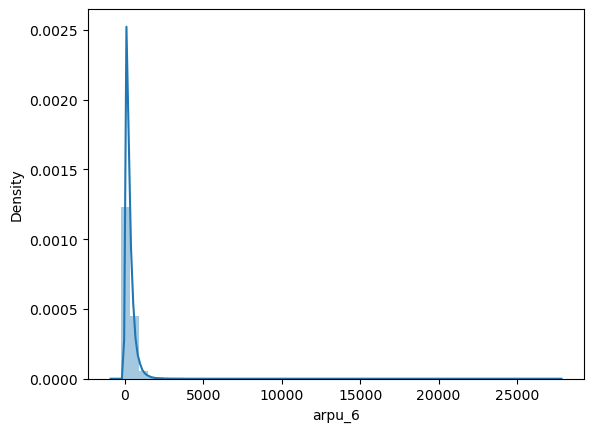

In [56]:
#Plotting average revenue per customer
sns.distplot(telecomTrain_df.arpu_6)
plt.show()

In [57]:
## Most or arpu is less than 2000

<Axes: xlabel='churn_probability', ylabel='Density'>

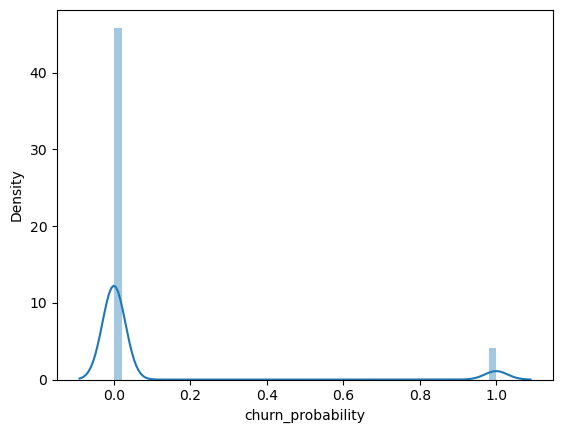

In [46]:
sns.distplot(telecomTrain_df.churn_probability)
plt.show()

<Axes: xlabel='last_rech_8', ylabel='Density'>

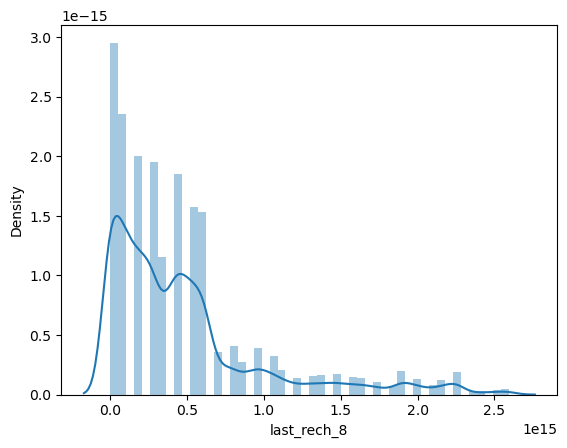

In [48]:
# checking last recharge during month 8
sns.distplot(telecomTrain_df.last_rech_8)
plt.show()

<Axes: xlabel='churn_probability', ylabel='total_rech_num_6'>

<function matplotlib.pyplot.show(close=None, block=None)>

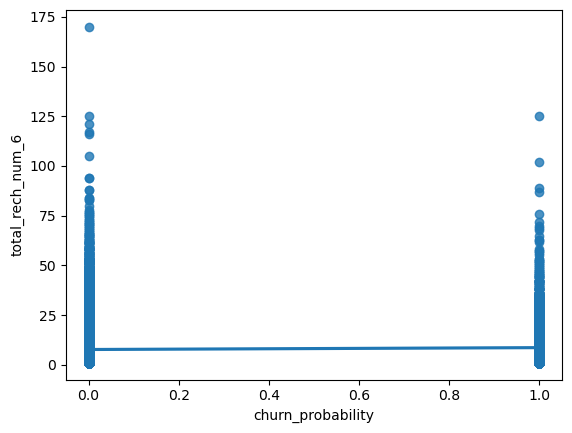

In [58]:
sns.regplot(x=telecomTrain_df.churn_probability,y= telecomTrain_df.total_rech_num_6)
plt.show

In [ ]:
## Minutes of usage went down for chrun customers during month 8.

<Axes: xlabel='churn_probability', ylabel='onnet_mou_7'>

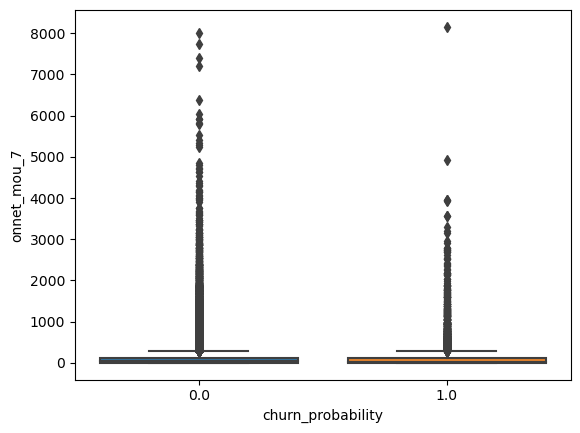

In [59]:
sns.boxplot(x=telecomTrain_df.churn_probability,y= telecomTrain_df.onnet_mou_7)
plt.show()

<Axes: xlabel='churn_probability', ylabel='aon'>

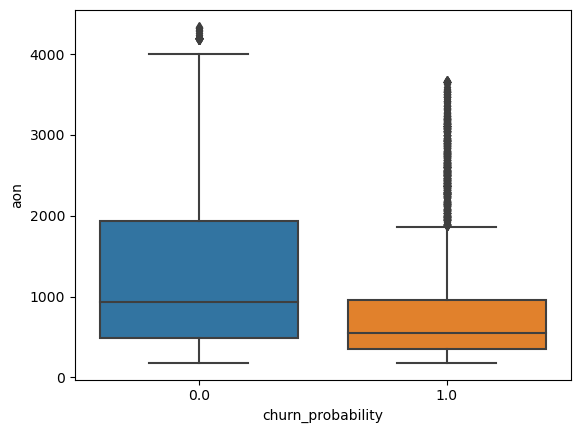

In [51]:
sns.boxplot(x=telecomTrain_df.churn_probability,y= telecomTrain_df.aon)
plt.show()


In [60]:
## Age on netwrok is proportional to churn probability. More days they stay they may continue to be on same network

In [63]:
num_cols = telecomTrain_df.select_dtypes(include ='float').columns

In [64]:
num_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=155)

### Outlier treatment

In [61]:
# Capping outliers
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [65]:
# cap outliers in the numeric columns
telecomTrain_df[num_cols] = telecomTrain_df[num_cols].apply(cap_outliers, axis=0)

## Modelling

In [66]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [67]:
# Before continuing with modelling time column is replaced to numeric by converting days to 0 and 1, if recharge is done then 1 else 0
time_cols = ['last_rech_6','last_rech_7','last_rech_8']

In [68]:
telecomTrain_df['last_rech_6']= telecomTrain_df['last_rech_6'].replace('0 days', 0)
telecomTrain_df['last_rech_7']= telecomTrain_df['last_rech_7'].replace('0 days', 0)
telecomTrain_df['last_rech_8']= telecomTrain_df['last_rech_8'].replace('0 days', 0)
telecomTrain_df['last_rech_6'] = telecomTrain_df['last_rech_6'].apply(lambda x:0 if x == 0 else 1)
telecomTrain_df['last_rech_7'] = telecomTrain_df['last_rech_7'].apply(lambda x:0 if x == 0 else 1)
telecomTrain_df['last_rech_8'] = telecomTrain_df['last_rech_8'].apply(lambda x:0 if x == 0 else 1)

In [69]:

telecomTest_df['last_rech_6']= telecomTest_df['last_rech_6'].replace('0 days', 0)
telecomTest_df['last_rech_7']= telecomTest_df['last_rech_7'].replace('0 days', 0)
telecomTest_df['last_rech_8']= telecomTest_df['last_rech_8'].replace('0 days', 0)
telecomTest_df['last_rech_6'] = telecomTest_df['last_rech_6'].apply(lambda x:0 if x == 0 else 1)
telecomTest_df['last_rech_7'] = telecomTest_df['last_rech_7'].apply(lambda x:0 if x == 0 else 1)
telecomTest_df['last_rech_8'] = telecomTest_df['last_rech_8'].apply(lambda x:0 if x == 0 else 1)

In [70]:
telecomTrain_df[time_cols].head()

,last_rech_6,last_rech_7,last_rech_8
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [71]:
telecomTrain_df.churn_probability.astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 65945, dtype: int32

### Train test split: Since the test is given as separate dataset we will add validation split instead of test split on training data

In [72]:
# divide data into train and validation
X = telecomTrain_df.drop("churn_probability", axis = 1)
y = round(telecomTrain_df.churn_probability,0)
X_train, X_validate, y_train, y_validate= train_test_split(X, y, test_size = 0.20, random_state = 4, stratify = y)

In [73]:
# Test set
X_test = telecomTest_df.drop(['id','circle_id'], axis =1)

In [74]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
X_validate.shape
y_validate.shape

(52756, 157)

(52756,)

(30000, 157)

(13189, 157)

(13189,)

### Scaling

In [75]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [77]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_validate = scaler.transform(X_validate)
# transforming the test using the already fit scaler
X_test = scaler.transform(X_test)

### Class Imbalance : SMOT

Handling class imbalance.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

Advantages

Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
No loss of useful information

In [80]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 4356
Before OverSampling, counts of label '0': 48400 

Before OverSampling, churn event rate : 8.26% 



#### We see that only 8.26% of churn customer data is present in the data set. Hence applying SMOT technique of over sampling

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12,sampling_strategy=0.7)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [80]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (82280, 157)
After OverSampling, the shape of train_y: (82280,) 

After OverSampling, counts of label '1': 33880
After OverSampling, counts of label '0': 48400
After OverSampling, churn event rate : 41.18% 



#### After applying SMOT we see that the churn rate have increased to 41% which is better.

### PCA

In [81]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)


In [82]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [83]:
pca.explained_variance_ratio_[:50]

array([0.19367314, 0.12949163, 0.07399593, 0.04947624, 0.04134544,
       0.02821151, 0.02750747, 0.02694624, 0.0262428 , 0.0232037 ,
       0.02229532, 0.02180955, 0.01929583, 0.0167013 , 0.01346897,
       0.01323617, 0.01204836, 0.01101126, 0.0102996 , 0.00986727,
       0.00867558, 0.0085091 , 0.00825775, 0.00740415, 0.00729468,
       0.00721706, 0.0070635 , 0.0066812 , 0.00646934, 0.00628545,
       0.00620574, 0.0055128 , 0.00539061, 0.0053213 , 0.00525849,
       0.00504778, 0.00501156, 0.00453377, 0.00443345, 0.00437477,
       0.00423679, 0.00372644, 0.00359124, 0.00353426, 0.00323319,
       0.00323041, 0.00315438, 0.00302429, 0.00294745, 0.00290264])

#### Scree plot to determine number of features to consider

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

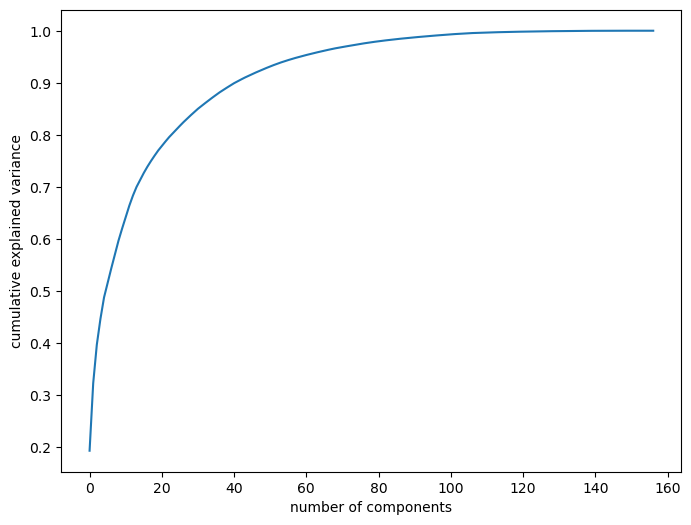

In [84]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### From the above plot we can explain that 60 variables explain about 95% of variance. So we shall consider 60 as optimum number of components

In [85]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [86]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(82280, 60)

In [87]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.01078423935005758 , min corr:  -0.02037130444456184


In [88]:
#Applying selected components to the test data - 60 components
X_validate_pca = pca_final.transform(X_validate)
X_validate_pca.shape

(13189, 60)

In [89]:
#Applying the selected components on test dataset
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(30000, 60)

### Logistic regression

In [90]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [91]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [92]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8352
Recall/Sensitivity : 0.8462
AUC Score (Train): 0.908657
CV Score : Mean - 0.9082279 | Std - 0.003700031 | Min - 0.9016306 | Max - 0.9130556


In [93]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [119]:
# predictions on Test data
pred_probs_validate= lr0.predict(X_validate_pca)
getModelMetrics(y_validate,pred_probs_validate)

Roc_auc_score : 0.8210927456382001
Sensitivity/Recall : 0.8218549127640037
Specificity: 0.8203305785123967
False Positive Rate: 0.17966942148760331
Positive predictive value: 0.2916259367872271
Negative Predictive value: 0.9808300395256917
sklearn precision score value: 0.2916259367872271


We see auc score to be 82 % 

In [95]:
# predictions on Test data
pred_probs_validateTest= lr0.predict(X_test_pca)
pred_probs_validateTest

array([0., 0., 1., ..., 1., 1., 1.])

In [107]:
predict_df = pd.DataFrame(pred_probs_validateTest, columns = ['churn_probability'])

In [112]:
predict_df.head()

,churn_probability
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [116]:
lr_test_churnPredict.head()

,id,churn_probability
0,69999.0,0.0
1,70000.0,0.0
2,70001.0,1.0
3,70002.0,0.0
4,70003.0,0.0


In [115]:
lr_test_churnPredict = pd.concat([telecomTest_df.id,predict_df.churn_probability],axis = 1)

In [117]:
## Getting csv file with predicted test output
predict_df.to_csv('TestPredictLR1.csv', index=False)

In [120]:
print("Accuracy : {}".format(metrics.accuracy_score(y_validate,pred_probs_validate)))
print("Recall : {}".format(metrics.recall_score(y_validate,pred_probs_validate)))
print("Precision : {}".format(metrics.precision_score(y_validate,pred_probs_validate)))

Accuracy : 0.8204564409735385
Recall : 0.8218549127640037
Precision : 0.2916259367872271


In [121]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.91


In [122]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [123]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8351992325855963
Sensitivity/Recall : 0.8461629279811098
Specificity: 0.8242355371900827
False Positive Rate: 0.17576446280991737
Positive predictive value: 0.7711634162743779
Negative Predictive value: 0.8844474005099213
sklearn precision score value: 0.7711634162743779


,churn,churn_Prob,final_predicted
0,0.0,0.368902,0
1,0.0,0.010268,0
2,0.0,0.020685,0
3,0.0,0.297237,0
4,0.0,0.253687,0


Plotting the ROC Curve : An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

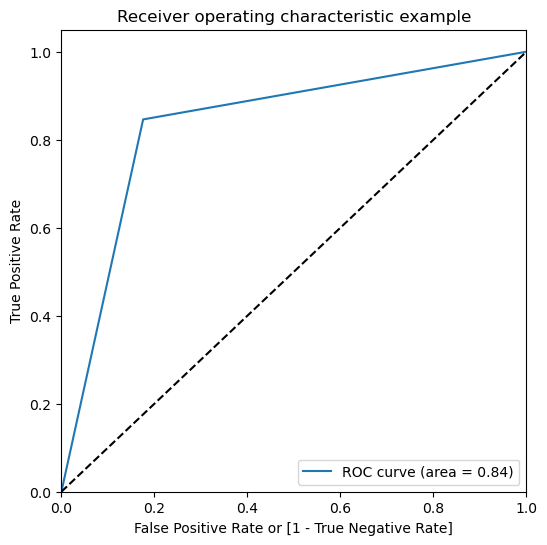

(array([0.        , 0.17576446, 1.        ]),
 array([0.        , 0.84616293, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [125]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

### Random Forest Classifier

In [126]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [127]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [128]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9323111603076756
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [129]:
# predict churn on test data
y_pred = model.predict(X_validate)

# create onfusion matrix
cm = confusion_matrix(y_validate, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_validate, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_validate)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_validate, y_pred_prob),2))

[[11942   158]
 [  525   564]]
Sensitivity: 	0.52
Specificity: 	0.99
AUC:    	 0.93


In [130]:
#Choosing best features
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))# number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


Sensitivity of random forest is better than Logistic Regression

In [131]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [132]:
# predict churn on test data
y_pred = rf_model.predict(X_validate)

# create onfusion matrix
cm = confusion_matrix(y_validate, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_validate, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_validate)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_validate, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[11954   146]
 [  544   545]]
Sensitivity: 	0.5
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RF model works better on validation dataset

In [133]:
## RF classification for test data
# predict churn on test data
y_pred_test = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


In [136]:
RF_pred_df = pd.DataFrame(y_pred_test, columns = ['churn_probability'])

In [137]:
RF_pred_df.head()

,churn_probability
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [138]:
rf_test_churnPredict = pd.concat([telecomTest_df.id,RF_pred_df.churn_probability],axis = 1)

In [145]:
rf_test_churnPredict= rf_test_churnPredict.astype('int')

In [146]:
rf_test_churnPredict.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [147]:
rf_test_churnPredict.to_csv('sample_Praneta_RF1.csv', index=False)

### Feature Importance

In [148]:

# predictors
features = telecomTrain_df.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,loc_ic_t2t_mou_8,5.455254
1,total_ic_mou_8,5.394881
2,loc_og_t2m_mou_8,5.295203
3,total_og_mou_8,3.908503
4,loc_ic_mou_8,3.543006
5,roam_og_mou_8,3.449626
6,arpu_8,3.199672
7,last_day_rch_amt_8,2.871079
8,loc_og_t2t_mou_8,2.795749
9,roam_ic_mou_8,2.615668


In [148]:
telecomTrain_df.loc_ic_t2t_mou_8.value_counts()

 0      10395
 1       2468
-64      2187
 2       2141
 3       1931
        ...  
 414        1
 364        1
 383        1
 370        1
 425        1
Name: loc_ic_t2t_mou_8, Length: 463, dtype: int64

In [149]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]


<Axes: >

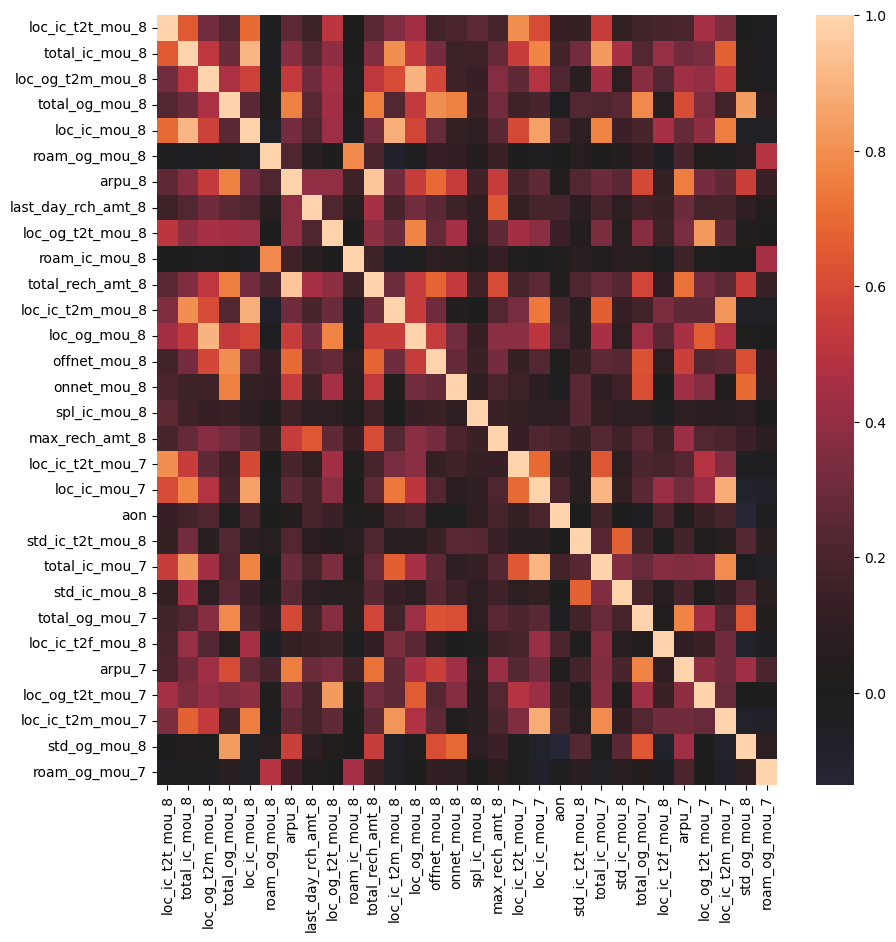

In [153]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
sns.heatmap(data=telecomTrain_df[top_features].corr(), center=0.0)

In [230]:
X = telecomTrain_df.drop("churn_probability", axis = 1)
y = round(telecomTrain_df.churn_probability,0)

In [249]:
top_features = ['total_ic_mou_8', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = telecomTrain_df[top_features]
y_train = round(telecomTrain_df.churn_probability,0)
X_test = telecomTest_df[top_features]

In [250]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [185]:
y_train.value_counts()

0.0    60500
1.0     5445
Name: churn_probability, dtype: int64

In [176]:
y_train= y_train.astype('int')

In [187]:
modelfit(lr0, X_train, y_train)


Model Report
Accuracy : 0.7654
Recall/Sensitivity : 0.845
AUC Score (Train): 0.861490
CV Score : Mean - 0.8609378 | Std - 0.009618711 | Min - 0.843131 | Max - 0.8721949


In [251]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [252]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [238]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8617789692568056
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [253]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [254]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [256]:
# coefficients
coefficients = logistic_model.coef_.reshape((8, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [257]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.334046,-1.496634,-1.556219,-0.123525,0.050212,0.308498,0.190818,-0.507411,1.080918


#### Random forest is better model for us as per above observations and accuracy.

## Business Insights

#### The most important features can be deduced from the heat map: minutes of usage during 8th month, recharge amount followed by month 7 and age on network.
#### When minutes of usage goes down (negative correlation) then customer may churn.
#### Roaming , STD also plays a role in customer churning.
#### Provide good roaming and STD traffis and facility to retain the customer.
#### Cutomer churn is high after 8th month so provide offers know the issues and provide solutions for it.
